### 3. Transfer B-factor between .pdbs

Script to transfer the B-factor from the PyLipid coordinates to the original PDB structure

In [1]:
from biopandas.pdb import PandasPdb
import matplotlib.pyplot as plt
import numpy as np

In [2]:
pdbs = ["8GF8", "6U84", "6MHO", "8T1B", "6O1P", "6BO8"]

for t, pdb in enumerate(pdbs):
    for lipid in  ["CHOL", "POPC", "PAPC", "POPE", "DIPE", "PAPS", "DPSM", "POPA", "PAP1", "PAP6"]:

        bfactor_coord_file = f"/home/apmlab/Projects/Mario/TRPVs/Simulations/TRPV{t+1}/PyLipid/\
Interaction_{lipid}/Coordinate_{lipid}/Coordinate_{lipid}_Residence_Time_max.pdb"

        new_coord_file = f"/home/apmlab/Projects/Mario/TRPVs/System_setups/\
/{pdb}_AA_CHARMM.pdb"

        new_bfactor_file = f"/home/apmlab/Projects/Mario/TRPVs/Simulations/TRPV{t+1}/PyLipid/\
Interaction_{lipid}/Coordinate_{lipid}/New_coord_{lipid}_Residence_Time_max.pdb"

        pdb_bfactor = PandasPdb().read_pdb(bfactor_coord_file)
        new_pdb_bfactor = PandasPdb().read_pdb(new_coord_file)

        #Prepare bfactor column
        current_resid = new_pdb_bfactor.df["ATOM"]["residue_number"][0]
        i = 1
        for row in new_pdb_bfactor.df["ATOM"].index:
                resid = new_pdb_bfactor.df["ATOM"].loc[row, "residue_number"]
                if resid == current_resid: 
                        new_pdb_bfactor.df["ATOM"].loc[row, "b_factor"] = i
                elif resid > current_resid:
                        current_resid = resid
                        i += 1
                        new_pdb_bfactor.df["ATOM"].loc[row, "b_factor"] = i
                elif resid < current_resid:
                        current_resid = resid
                        i = 1
                        new_pdb_bfactor.df["ATOM"].loc[row, "b_factor"] = i


        #Assign bfactorsa to AA structure
        for resnum in set(new_pdb_bfactor.df["ATOM"]["b_factor"]):
                bfactor = list(pdb_bfactor.df["ATOM"].loc[pdb_bfactor.df["ATOM"]["residue_number"] == resnum, "b_factor"])[0]
                new_pdb_bfactor.df["ATOM"].loc[new_pdb_bfactor.df["ATOM"]["b_factor"] == resnum, "b_factor"] = bfactor
        
        #Save
        new_pdb_bfactor.to_pdb(new_bfactor_file)

        print(f"Saved {new_bfactor_file}")

Saved /home/apmlab/Projects/Mario/TRPVs/Simulations/TRPV1/PyLipid/Interaction_CHOL/Coordinate_CHOL/New_coord_CHOL_Residence_Time_max.pdb
Saved /home/apmlab/Projects/Mario/TRPVs/Simulations/TRPV1/PyLipid/Interaction_POPC/Coordinate_POPC/New_coord_POPC_Residence_Time_max.pdb
Saved /home/apmlab/Projects/Mario/TRPVs/Simulations/TRPV1/PyLipid/Interaction_PAPC/Coordinate_PAPC/New_coord_PAPC_Residence_Time_max.pdb
Saved /home/apmlab/Projects/Mario/TRPVs/Simulations/TRPV1/PyLipid/Interaction_POPE/Coordinate_POPE/New_coord_POPE_Residence_Time_max.pdb
Saved /home/apmlab/Projects/Mario/TRPVs/Simulations/TRPV1/PyLipid/Interaction_DIPE/Coordinate_DIPE/New_coord_DIPE_Residence_Time_max.pdb
Saved /home/apmlab/Projects/Mario/TRPVs/Simulations/TRPV1/PyLipid/Interaction_PAPS/Coordinate_PAPS/New_coord_PAPS_Residence_Time_max.pdb
Saved /home/apmlab/Projects/Mario/TRPVs/Simulations/TRPV1/PyLipid/Interaction_DPSM/Coordinate_DPSM/New_coord_DPSM_Residence_Time_max.pdb
Saved /home/apmlab/Projects/Mario/TRPVs/S

In [16]:
pdb = "8GF8"
t = 0
lipid = "CHOL"

bfactor_coord_file = f"/home/apmlab/Projects/Mario/TRPVs/Simulations/TRPV{t+1}/PyLipid/\
Interaction_{lipid}/Coordinate_{lipid}/Coordinate_{lipid}_Residence_Time_max.pdb"

new_coord_file = f"/home/apmlab/Projects/Mario/TRPVs/System_setups/\
{pdb}_AA_CHARMM.pdb"

pdb_bfactor = PandasPdb().read_pdb(bfactor_coord_file)
new_pdb_bfactor = PandasPdb().read_pdb(new_coord_file)

print(len(set(pdb_bfactor.df["ATOM"]["residue_number"])))
print(len(set(new_pdb_bfactor.df["ATOM"]["residue_number"])))

#Prepare bfactor column
current_resid = new_pdb_bfactor.df["ATOM"]["residue_number"][0]
i = 1
for row in new_pdb_bfactor.df["ATOM"].index:
    resid = new_pdb_bfactor.df["ATOM"].loc[row, "residue_number"]
    if resid == current_resid: 
        new_pdb_bfactor.df["ATOM"].loc[row, "b_factor"] = i
    elif resid > current_resid:
        current_resid = resid
        i += 1
        new_pdb_bfactor.df["ATOM"].loc[row, "b_factor"] = i
    elif resid < current_resid:
        current_resid = resid
        i = 1
        new_pdb_bfactor.df["ATOM"].loc[row, "b_factor"] = i


#Assign bfactorsa to AA structure
for resnum in set(new_pdb_bfactor.df["ATOM"]["b_factor"]):
    bfactor = list(pdb_bfactor.df["ATOM"].loc[pdb_bfactor.df["ATOM"]["residue_number"] == resnum, "b_factor"])[0]
    new_pdb_bfactor.df["ATOM"].loc[new_pdb_bfactor.df["ATOM"]["b_factor"] == resnum, "b_factor"] = bfactor
   
#Save
new_pdb_bfactor.to_pdb(new_bfactor_file)

630
630


,record_name,atom_number,blank_1,atom_name,alt_loc,residue_name,blank_2,chain_id,residue_number,insertion,...,x_coord,y_coord,z_coord,occupancy,b_factor,blank_4,segment_id,element_symbol,charge,line_idx
0,ATOM,1,,N,,ARG,,P,115,,...,63.095,62.898,146.365,1.0,143.17,,PROA,,NaN,3
1,ATOM,2,,HT1,,ARG,,P,115,,...,63.380,63.104,145.386,1.0,0.00,,PROA,,NaN,4
2,ATOM,3,,HT2,,ARG,,P,115,,...,62.851,61.891,146.450,1.0,0.00,,PROA,,NaN,5
3,ATOM,4,,HT3,,ARG,,P,115,,...,63.881,63.120,147.009,1.0,0.00,,PROA,,NaN,6
4,ATOM,5,,CA,,ARG,,P,115,,...,61.911,63.728,146.723,1.0,143.17,,PROA,,NaN,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40796,ATOM,40797,,HA1,,GLY,,P,769,,...,73.471,70.681,132.070,1.0,0.00,,PROD,,NaN,40799
40797,ATOM,40798,,HA2,,GLY,,P,769,,...,72.656,71.182,130.580,1.0,79.52,,PROD,,NaN,40800
40798,ATOM,40799,,C,,GLY,,P,769,,...,71.344,70.680,132.181,1.0,79.52,,PROD,,NaN,40801
40799,ATOM,40800,,OT1,,GLY,,P,769,,...,70.593,71.441,132.848,1.0,0.00,,PROD,,NaN,40802


In [44]:

for resnum in set(new_pdb_bfactor.df["ATOM"]["b_factor"]):
    bfactor = list(pdb_bfactor.df["ATOM"].loc[pdb_bfactor.df["ATOM"]["residue_number"] == resnum, "b_factor"])[0]
    new_pdb_bfactor.df["ATOM"].loc[new_pdb_bfactor.df["ATOM"]["b_factor"] == resnum, "b_factor"] = bfactor
    

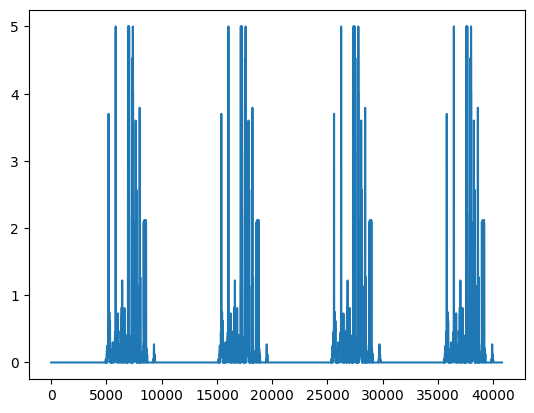